In [1]:
datafolders = ["../data/SE_anneal/capped_data",
               "../data/SE_anneal/uncapped_data"]

In [14]:
import pandas as pd
import import_ipynb
from hall_data import doping, anneal, capping, params

importing Jupyter notebook from hall_data.ipynb


In [5]:
parameters = pd.concat([
    pd.read_csv(datafolder + '/parameters.csv', sep = '\t') for datafolder in datafolders
])

In [12]:
optics = pd.concat([
    pd.read_csv(datafolder + '/optical_constants.tsv', sep = '\t', index_col = False, header = 1).set_index('eV')
    for datafolder in datafolders],
    axis = 1
)

In [13]:
optics

,"n, int_cap_300C","n, int_cap_350C","n, int_cap_400C","n, int_cap_450C","n, int_cap_500C","n, int_cap_550C","n, int_cap_600C","n, int_cap_650C","n, int_cap_700C","n, int_cap_asdep",...,"k, r48_nocap_400C","k, r48_nocap_450C","k, r48_nocap_500C","k, r48_nocap_asdep","k, r96_nocap_300C","k, r96_nocap_350C","k, r96_nocap_400C","k, r96_nocap_450C","k, r96_nocap_500C","k, r96_nocap_asdep"
eV,,,,,,,,,,,,,,,,,,,,,
3.987138,1.970251,1.972297,1.963984,1.964516,1.954287,1.949282,1.933252,1.933657,1.926549,1.960968,...,0.544983,0.521379,0.520044,0.528523,0.510402,0.522114,0.521052,0.507546,0.509310,0.533366
3.974359,1.976815,1.978901,1.970349,1.970903,1.960357,1.954644,1.938231,1.938624,1.931313,1.967403,...,0.545211,0.523066,0.521758,0.526776,0.511449,0.523251,0.522799,0.509745,0.511482,0.534044
3.961661,1.983471,1.985599,1.976808,1.977385,1.966522,1.960094,1.943306,1.943685,1.936175,1.973933,...,0.545330,0.524681,0.523400,0.524882,0.512412,0.524309,0.524478,0.511894,0.513601,0.534614
3.949045,1.990223,1.992393,1.983363,1.983964,1.972783,1.965634,1.948478,1.948845,1.941138,1.980560,...,0.545337,0.526219,0.524968,0.522837,0.513291,0.525283,0.526087,0.513989,0.515665,0.535070
3.936508,1.997071,1.999284,1.990016,1.990641,1.979142,1.971266,1.953752,1.954105,1.946205,1.987286,...,0.545229,0.527679,0.526457,0.520638,0.514080,0.526170,0.527620,0.516027,0.517670,0.535410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.754258,1.803026,1.798797,1.810005,1.811188,1.821709,1.807815,1.796092,1.763047,1.747767,1.815879,...,0.032265,0.031471,0.031910,0.207518,0.073079,0.033990,0.030596,0.031766,0.033154,0.111477
0.753799,1.802817,1.798583,1.809806,1.810990,1.821521,1.807593,1.795851,1.762766,1.747465,1.815684,...,0.032327,0.031528,0.031968,0.207984,0.073229,0.034056,0.030653,0.031824,0.033214,0.111711
0.753341,1.802608,1.798368,1.809606,1.810791,1.821333,1.807370,1.795611,1.762484,1.747162,1.815489,...,0.032389,0.031585,0.032025,0.208451,0.073379,0.034121,0.030710,0.031881,0.033274,0.111945


<AxesSubplot:xlabel='anneal', ylabel='Roughness (nm)'>

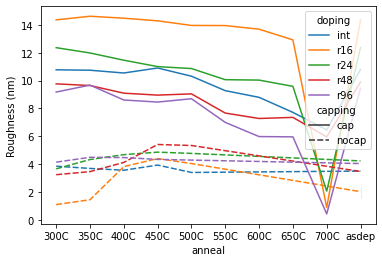

In [35]:
import seaborn as sns
def get_params(x):
    values = x.sample_name.split('_')
    keys = ['doping', 'capping', 'anneal']
    return pd.Series({**x, **dict(zip(keys, values))})
    
    
sns.lineplot(x = 'anneal',
                y = 'Roughness (nm)',
                hue = 'doping',
                style = 'capping',
                data  = parameters.rename(columns = {' ': 'sample_name'}).apply(get_params, axis = 1),
               )
